# Red Neuronal de Aprendizaje Profundo

Esta hoja Colaboratory está preparada para que puedas completar tu código del entrenamiento de una red neurnal con cualquier número de capas.

¡Suerte y Ánimo!

## Función para mostrar el progreso y funciones de activación y derivadas

In [1]:
from tqdm import tqdm  # Para mostrar una barra de progreso
from IPython import display; # Para poder borrar la salida de las celdas, y presentar gráficos del progreso poco a poco
import matplotlib.pyplot as plt # Para dibujar gráficas
import numpy as np # Para el cálculo matemático sobre vectores y matrices


def show_progress(loss_output, num_errors_data, max_iterations):
  """
  Esta función simplemente muestra el progreso del entrenamiento de la Red en un gráfico.
  También presenta el error log. actual, el mínimo en algún momento,
  el porcentaje de errores actual, y el mínimo porcentaje de errore sen algún momento.

  NO DEBES MODIFICAR NADA EN ESTA FUNCIÓN.

  :param loss_output: lista con los valores de error log a mostrar en la gráfica
  :param num_errors_data: lista con el número de errores de predicción a mostrar en la gráfica
  :param max_iterations: Entero. Número máximo de iteraciones de entrenamiento. Se usara para fijar el rango del eje x de la gráfica
  :return: None
  """
  fig, ax1 = plt.subplots();
  ax2 = plt.gca().twinx();
  plt.title('Error log. y Número de errores');
  plt.xlabel('Iteración');
  ax1.set_ylabel('Log Error');
  ax2.set_ylabel('Ratio errors');
  ax1.set_yscale("log");
  ax1.set_xlim([0, max_iterations]);
  ax2.set_xlim([0, max_iterations]);
  ax2.set_ylim([0, max(num_errors_data)+0.05]);
  fig = plt.gcf();
  ax1.plot(loss_output, label='Error log.');
  ax2.plot(num_errors_data, label='Ratio errors', color='orange');
  lines_1, labels_1 = ax1.get_legend_handles_labels();
  lines_2, labels_2 = ax2.get_legend_handles_labels();
  lines = lines_1 + lines_2;
  labels = labels_1 + labels_2;
  ax1.legend(lines, labels, loc='upper right');

  _ = display.clear_output(wait=True);
  _ = display.display(fig);

  display.display('Current Error log.: {:.5f} / Min Error log.: {:.5f}'.format(loss_output[-1], np.min(loss_output)));
  display.display('Current Ratio of errors: {:.5f}% / Min Ratio of errors: {:.5f}%'.format(num_errors_data[-1]*100, np.min(num_errors_data)*100));
  plt.close('all');
  plt.clf();



def sigmoid(Z):
  """
  Función sigmoide.
  
  DEBES COMPLETAR ESTA FUNCIÓN

  :param Z: ndarray con los valores a los que se le desea aplicar la sigmoide
  :return: ndarray con los valores resultado
  """
  ############################
  # TODO - Inicio
  #
  # Escribe la fórmula de la función sigmoide, reemplazando los puntos suspensivos.
  # Recuerda que no necesitas hacer nada especial para tratar con ndarray de valores. Numpy lo hace por ti.
  # Por ello, basta con que escribas la función usando directamente Z, sin usar ningún bucle for,
  # y usando la función np.exp para la exponencia.
  ############################
  result = 1. / (1 + np.exp(-Z))
  ############################
  # TODO - Fin
  ############################
  return result





def protected_sigmoid(Z):
  """
  Función sigmoide protegida. Esta función simplemente engloba la anterior y la
  protege frente a valores de Z que pudieran producir un overflow en el 
  cálculo de la exponencial. Es decir, un valor demasiado alto (negativo) de Z
  podría hacer que el cálculo de np.exp(-Z) no fuese representable en el
  programa. Esta función simplemente evita ese caso.

  NO DEBES MODIFICAR NADA EN ESTA FUNCIÓN.

  :param Z: ndarray con los valores a los que se le desea aplicar la sigmoide
  :return: ndarray con los valores resultado
  """
  assert type(Z) == np.ndarray, 'La función protected_sigmoid sólo acepta arrays de numpy, no ' + str(type(Z))
  aux = np.where(-Z > np.log(np.finfo(Z.dtype).max), np.nan, Z)
  result = sigmoid(aux)
  return np.where(-Z > np.log(np.finfo(Z.dtype).max), 0.0, result)




def identity(Z):
  """
  Función identidad

  DEBES COMPLETAR ESTA FUNCIÓN

  :param Z: ndarray con los valores a los que se le desea aplicar la identidad
            (es decir, devolver el mismo Z)
  :return: ndarray con los valores resultado
  """
  ############################
  # TODO - Inicio
  #
  # Escribe la fórmula de la función identidad, reemplazando los puntos suspensivos (simplemente Z)
  ############################
  return Z
  ############################
  # TODO - Fin
  ############################





def identity_prime(Z):
  """
  Función derivada de la función identidad

  DEBES COMPLETAR ESTA FUNCIÓN

  :param Z: ndarray con los valores sobre los que se quiere calcular
            la derivada de la función identidad
  :return: ndarray con los valores resultado
  """
  ############################
  # TODO - Inicio
  #
  # Completa el código de la función reemplazando los puntos suspensivos.
  #
  # Como la derivada de la identidad es 1 en todos sus puntos, debieras
  # devolver un vector con tantos unos como elemnetos haya en Z.
  # Utiliza alguna función de numpy que genere un vector de unos, y pásale
  # como argumento el número de elementos de Z.
  # 
  # Por ejemplo. Si se deseasen tantos ceros como elementos en Z
  # bastaría escribir return np.zeros(Z.shape)
  ############################
  return np.ones(Z.shape)
  ############################
  # TODO - Fin
  ############################






def sigmoid_prime(Z):
  """
  Función derivada de la función sigmoide

  DEBES COMPLETAR ESTA FUNCIÓN

  :param Z: ndarray con los valores sobre los que se quiere calcular
            la derivada de la función sigmoide
  :return: ndarray con los valores resultado
  """
  ############################
  # TODO - Inicio
  # 
  # Completa el código de la función reemplazando los puntos suspensivos.
  #
  # Recuerda que la derivada de   la función sigmoide en los puntos Z
  # es igual a A * (1. - A), donde A son los valores de la función sigmoide
  # en dichos puntos.
  ############################
  A = protected_sigmoid(Z)
  return A * (1. - A)
  ############################
  # TODO - Fin
  ############################






def relu(Z):
  """
  Función ReLU (lineal rectividada)

  DEBES COMPLETAR ESTA FUNCIÓN

  :param Z: ndarray con los valores sobre los que se quiere calcular
            la función ReLU
  :return: ndarray con los valores resultado
  """
  ############################
  # TODO - Inicio
  # 
  # Completa el código de la función reemplazando los puntos suspensivos.
  #  
  # Recuerda que la función ReLU es simplemente la identidad (Z)
  # para los valores positivos, y 0 en otro caso.
  ############################
  return np.where(Z > 0, Z, 0)
  ############################
  # TODO - Fin
  ############################






def relu_prime(Z):
  """
  Función derivada de la ReLU

  DEBES COMPLETAR ESTA FUNCIÓN

  :param Z: ndarray con los valores sobre los que se quiere calcular
            la derivada de la función ReLU
  :return: ndarray con los valores resultado
  """
  ############################
  # TODO - Inicio
  # 
  # Completa el código de la función reemplazando los puntos suspensivos.
  #  
  # Recuerda que la derivada de la función ReLU la calculamos como
  # la derivada de la identidad (1) para los valores positivos, y 0 en otro caso.
  ############################
  return np.where(Z > 0, 1, 0)
  ############################
  # TODO - Fin
  ############################



## Código para el entrenamiento de una red neuronal con 2 capas

Aunque el resto de la hoja está preparada para que programes una red neuronal con cualquier número de capas, te sugiero que primero resuelvas el caso de una red con sólo dos capas, que será más fácil de depurar. Mi consejo es que sólo pases a una red neuronal con cualquier número de capas, una vez estés convencida o convencido de que el código para una red con dos capas es correcto.

In [2]:
def two_layers_network_prediction(X, W, b, g):
  """
  Función de predicción (propagación hacia adelante) en una red con dos capas

  DEBES COMPLETAR ESTA FUNCIÓN

  :param X: ndarray con los valores de los atributos del conjunto de patrones
  :param W: lista de matrices con los parámetros W de las neuronas de cada capa.
            Por congruencia con el código para una red con más capas, utilizaremos
            W[1] para la primera capa y W[2] para la segunda capa. W[0] no se utiliza.
  :param b: lista de vectores fila con los parámetros b de las neuronas de cada capa.
            Por congruencia con el código para una red con más capas, utilizaremos
            b[1] para la primera capa y b[2] para la segunda capa b[0] no se utiliza.
  :param g: lista de las funciones de activación de las neuronas por cada capa.
            Por congruencia con el código para una red con más capas, utilizaremos
            g[1] para la primera capa y g[2] para la segunda. g[0] no se utiliza
  :return: (predictions, Z, A), donde
            - predictions es un ndarray con los valores de la clase predicha (0 o 1) para los patrones en X
            - Z es una lista con ndarray con los valores intermedios calculados por las neuronas de cada capa.
              Por congruencia con el código para una red con más capas, utilizaremos
              Z[1] para la primera capa y Z[2] para la segunda. Z[0] tendrá X
            - A es una lista con ndarray con los valores de activación de las neuronas de cada capa.
              Por congruencia con el código para una red con más capas, utilizaremos
              A[1] es la activación de la primera capa y A[2] para la segunda. A[0] son los mismos patrones de entrada.
  """
  # Obtener el número de ejemplos en el conjunto de patrones e inicializar variables
  num_patterns = X.shape[1]
  A = [None, None, None]
  Z = [None, None, None]
  A[0] = X
  Z[0] = X
  num_layers = 2

  # Bucle para propagar la información hacia adelante por las dos capas
  for i in range(1, num_layers + 1):
    ############################
    # TODO - Inicio
    # 
    # Completa el código reemplazando los puntos suspensivos.
    # Se han incluido algunas instrucciones assert para comprobar algunos errores típicos.
    #  
    # 1. Debes calcular la transformación lineal de las neuronas de cada capa
    # y almacenarlo en la posición correspondiente de la variable Z. Recuerda que
    # esta transformación se calcula como el producto de la matriz de
    # parámetros W correspondiente, por la salida de las neuronas de la
    # capa anterior, más sus escalares.
    #
    # 2. Debes calcular la salida de las neuronas de cada capa y almacenarlo en
    # la posición correspondiente de la variable A. Recuerda que debes utilizar
    # la lista de funciones de activación g.
    ############################
    Z[i] = np.dot(W[i].T , A[i-1]) + b[i]
    assert Z[i].shape == (W[i].shape[1],A[i-1].shape[1]), \
       'Z['+str(i)+'].shape es ' + str(Z[i].shape) + ' y debería ser (' + str(W[i].shape[1]) + ',' + str(A[i-1].shape[1]) + ')'
    A[i] = g[i](Z[i])
    assert A[i].shape == Z[i].shape, \
       'A['+str(i)+'].shape es ' + str(A[i].shape) + ' y debería ser ' + str(Z[i].shape)
    ############################
    # TODO - Fin
    ############################

  return (np.round(A[num_layers]), Z, A)







def two_layers_network_training_step(X, Y, alfa, W, b, g, g_prime):
  """
  Función para una iteración del entrenamiento de una red con dos capas

  DEBES COMPLETAR ESTA FUNCIÓN

  :param X: ndarray con los valores de los atributos del conjunto de patrones
  :param Y: ndarray vector fila con los valores de las clases del conjunto de patrones
  :param alfa: Hyperparámetro velocidad de aprendizaje.
  :param W: lista de matrices con los parámetros W de las neuronas de cada capa.
            Por congruencia con el código para una red con más capas, utilizaremos
            W[1] para la primera capa y W[2] para la segunda capa. W[0] no se utiliza.
            LA FUNCIÓN ACTUALIZA ESTOS VALORES.
  :param b: lista de vectores fila con los parámetros b de las neuronas de cada capa.
            Por congruencia con el código para una red con más capas, utilizaremos
            b[1] para la primera capa y b[2] para la segunda capa b[0] no se utiliza.
            LA FUNCIÓN ACTUALIZA ESTOS VALORES.
  :param g: lista de las funciones de activación de las neuronas por cada capa.
            Por congruencia con el código para una red con más capas, utilizaremos
            g[1] para la primera capa y g[2] para la segunda. g[0] no se utiliza
  :param g_prime: lista de las funciones derivadas de las funciones 
            de activación de las neuronas por cada capa.
            Por congruencia con el código para una red con más capas, utilizaremos
            g_prime[1] para la primera capa y g_prime[2] para la segunda. g_prime[0] se asume que es la derivada de la función identidad
  :return: (loss_output, ratio_errors), donde
            - loss_output es el error log cometido antes de actualizar los parámetros
            - ratio_errors es el porcentaje de patrones en los que la red cometió error en la predicción, antes de actualizar los parámetros
  """
  
  assert g[2] == protected_sigmoid, 'Esta función no admite una función de activación en la segunda capa diferente a protected_sigmoid'
  assert g_prime[2] == sigmoid_prime, 'Esta función no admite una función derivada de la función de activación de la segunda capa diferente a la derivada de la sigmoide'
  assert g_prime[0] == identity_prime, 'Esta función no admite una función derivada en g_prime[0] diferente a identity_prime'

  # Inicialización de variables
  num_layers = 2
  num_patterns = X.shape[1]
  dZ,dA = [None] * (num_layers + 1), [None] * (num_layers + 1)
  dW,db = [None] * (num_layers + 1), [None] * (num_layers + 1)


  # Esta constante es sólo para evitar errores al calcular el logaritmo de 0
  epsilon = 1e-100

  # FORWARD PROPAGATION
  Y_pred, Z, A = two_layers_network_prediction(X, W, b, g)

  # Cálculo del error
  ratio_errors = np.sum(np.abs(Y - Y_pred)) / Y.shape[1]
  loss_output = -1 * np.mean(Y*np.log(A[-1]+epsilon) + (1-Y) * np.log(1 - A[-1]+epsilon))

  #BACK-PROPAGATION
  dZ[num_layers] = (A[num_layers] - Y) # Está asumiendo sigmoid en la última capa

  for i in reversed(range(1, num_layers + 1)):
    ############################
    # TODO - Inicio
    # 
    # Completa el código reemplazando los puntos suspensivos.
    # Se han incluido algunas instrucciones assert para comprobar algunos errores típicos.
    #  
    # Debes calcular las derivadas parciales con respecto a W, b, A y Z. Revisa el código de los vídeos
    ############################
    dW[i] = np.dot(A[i-1], dZ[i].T) / num_patterns
    assert dW[i].shape == W[i].shape, \
       'dW['+str(i)+'].shape es ' + str(dW[i].shape) + ' y debería ser ' + str(W[i].shape)
    db[i] = np.mean(dZ[i], axis=1, keepdims=True)
    assert db[i].shape == b[i].shape, \
       'db['+str(i)+'].shape es ' + str(db[i].shape) + ' y debería ser ' + str(b[i].shape)
    dA[i-1] = np.dot(W[i], dZ[i])
    assert dA[i-1].shape == A[i-1].shape, \
       'dA['+str(i-1)+'].shape es ' + str(dA[i-1].shape) + ' y debería ser ' + str(A[i-1].shape)
    dZ[i-1] = dA[i-1] * g_prime[i-1](Z[i-1])
    assert Z[i-1] is None or dZ[i-1].shape == Z[i-1].shape, \
       str(dZ[i-1] is None) + 'dZ['+str(i-1)+'].shape es ' + str(dZ[i-1].shape) + ' y debería ser ' + str(Z[i-1].shape)
    ############################
    # TODO - Fin
    ############################

  # ACTUALIZAR PARÁMETROS
  for i in range(1, num_layers + 1):
    W[i] = W[i] - alpha * dW[i]
    assert dW[i].shape == W[i].shape, \
       'W['+str(i)+'].shape es ' + str(W[i].shape) + ' y debería ser ' + str(dW[i].shape)
    b[i] = b[i] - alpha * db[i]
    assert db[i].shape == b[i].shape, \
       'b['+str(i)+'].shape es ' + str(b[i].shape) + ' y debería ser ' + str(db[i].shape)

  return loss_output, ratio_errors






def two_layers_network_training(X,Y, nn_hl, g, g_prime, alpha, num_iterations):
  """
  Función de predicción (propagación hacia adelante) en una red con dos capas

  NO DEBES MODIFICAR NADA EN ESTA FUNCIÓN.

  :param X: ndarray con los valores de los atributos del conjunto de patrones
  :param Y: ndarray vector fila con los valores de las clases del conjunto de patrones
  :param nn_hl: número de neuronas en la primera capa
  :param g: lista de las funciones de activación de las neuronas por cada capa.
            Por congruencia con el código para una red con más capas, utilizaremos
            g[1] para la primera capa y g[2] para la segunda. g[0] no se utiliza
  :param g_prime: lista de las funciones derivadas de las funciones 
            de activación de las neuronas por cada capa.
            Por congruencia con el código para una red con más capas, utilizaremos
            g_prime[1] para la primera capa y g_prime[2] para la segunda. g_prime[0] se asume que es la derivada de la función identidad
  :param alfa: Hyperparámetro velocidad de aprendizaje.
  :return: (W, b, loss_output, ratio_errors), donde
            - W
            - b
            - loss_output es el error log cometido antes de actualizar los parámetros
            - ratio_errors es el porcentaje de patrones en los que la red cometió error en la predicción, antes de actualizar los parámetros
  """
  np.random.seed(1)

  assert len(g) == len(g_prime), 'El número de funciones de activación en g, ' + str(len(g)) + ', debe ser igual al número de funciones derivadas de g en g_prime, ' + str(len(g_prime))
  assert g[2] == protected_sigmoid, 'Esta función no admite una función de activación en la segunda capa diferente a protected_sigmoid'
  assert g_prime[2] == sigmoid_prime, 'Esta función no admite una función derivada de la función de activación de la segunda capa diferente a la derivada de la sigmoide'
  assert g_prime[0] == identity_prime, 'Esta función no admite una función derivada en g_prime[0] diferente a identity_prime'

  # INICIALIZACIÓN DE PARÁMETROS
  num_layers = 2

  W,b = [None],[None] # nada para la capa 0
  W.append(np.random.randn(X.shape[0], nn_hl) * np.sqrt(2./X.shape[0]))
  b.append(np.zeros((nn_hl,1)))
  W.append(np.random.randn(nn_hl, 1) * np.sqrt(2./nn_hl))
  b.append(np.zeros((1,1)))

  #ENTRENAMIENTO
  loss_output = []
  num_errors_data = []
  for i in tqdm(range(num_iterations)):
    error_log, num_errors = two_layers_network_training_step(X,Y, alpha, W, b, g, g_prime)
    loss_output.append(error_log)
    num_errors_data.append(num_errors)

    if i % 500 == 0:
      show_progress(loss_output, num_errors_data, num_iterations)

  return W, b, loss_output, num_errors_data




# Prueba Red Neuronal de 2 capas en Infartos de Miocardio

## Conjunto de datos de infartos de miocardio

Lo primero que haremos será cargar un conjunto de datos del repositorio UCI (un repositorio con muchos conjuntos de datos de todo tipo)

Vamos a trabajar con un conjunto de datos sobre casos de infartos de miocardio:

**Myocardial infarction complications Data Set**
(https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications)

Por ahora, lo que nos interesa saber es que las características de los casos
son de tipo numérico, son 123, y la característica objetivo toma ocho
valores. Sin embargo, transformaremos el dataset para considerar el valor 0
como "sin complicaciones", y el resto como "con complicaciones".

In [7]:
%%capture
# La instrucción anterior omite mensajes que producen las intrucciones en esta
# celda. No son necesarios si todo va bien, en particular, si la siguiente celda
# se ejecuta sin problemas.

# Obtener el fichero de datos del respositorio UCI
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/00579/MI.data

import numpy as np

# Cargar los datos
data = np.genfromtxt('MI.data',delimiter=',')
num_features = data.shape[1]-1
num_patterns = data.shape[0]

# Éstas son las características de los casos
X = data[:,0:num_features].T

# El conjunto de datos tiene algunos valores perdidos. Los vamos a reemplazar por -1
np.nan_to_num(X, copy=False, nan=-1)

# Y éstos son los valores del atributo objetivo
# Fíjate en que realizamos una transformación para marcar si hubo o no
# complicaciones ( > 0)
Y = np.where(data[:, num_features].reshape((1,num_patterns)) > 0, 1, 0)

In [8]:
# Imprimimos alguna información del dataset
print('El conjunto de datos tiene', num_patterns,
      'patrones con', num_features, 'atributos cada uno')
print('El atributo objetivo sólo presenta los valores', np.unique(Y))
print(np.sum(Y), '({:.3f}%)'.format(100*np.sum(Y)/Y.shape[1]), ' con valor 1, y ',
      Y.shape[1]-np.sum(Y[:,:]), '({:.3f}%)'.format(100*(Y.shape[1]-np.sum(Y[:,:]))/Y.shape[1]),
      ' con valor 0.', sep='')

El conjunto de datos tiene 1700 patrones con 123 atributos cada uno
El atributo objetivo sólo presenta los valores [0 1]
271(15.941%) con valor 1, y 1429(84.059%) con valor 0.


### Probar con 10 neuronas y función sigmoide

Debiéramos mejorar notoriamente los resultados de la Regresión Logística

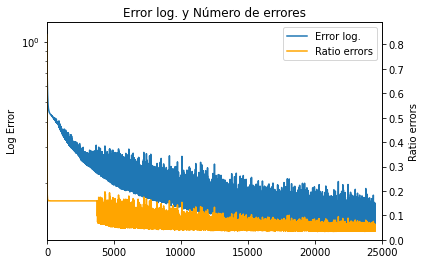

'Current Error log.: 0.13140 / Min Error log.: 0.11732'

'Current Ratio of errors: 4.58824% / Min Ratio of errors: 3.35294%'

100%|██████████| 25000/25000 [02:07<00:00, 196.34it/s]


<Figure size 432x288 with 0 Axes>

In [9]:
nn_hl = 10
g = [identity, protected_sigmoid, protected_sigmoid]
g_prime = [identity_prime, sigmoid_prime, sigmoid_prime]
num_iterations = 25000
alpha = 0.01 # Se probó con varios valores. Éste pareció el más conveniente

W_miocardio, b_miocardio, loss_miocarcio, ratio_errors_miocardio = \
  two_layers_network_training(X,Y, nn_hl, g, g_prime, alpha, num_iterations)

In [10]:
print(np.round(ratio_errors_miocardio[0], 3))

0.841


### Probar con 10 neuronas y función ReLU

En este caso, no vamos a obtener mejores resultados con la ReLU que con la sigmoide. Es de esperar que la sigmoide funcione mejor cuando hay pocas capas y las redes no sean muy grandes (aunque también depende del hyperparámetro velocidad de aprendizaje).

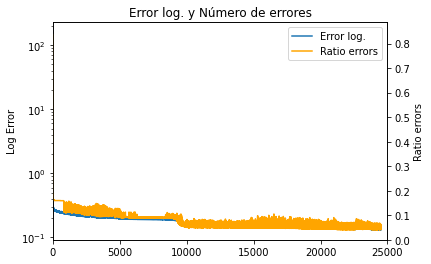

'Current Error log.: 0.13286 / Min Error log.: 0.13078'

'Current Ratio of errors: 4.29412% / Min Ratio of errors: 4.11765%'

100%|██████████| 25000/25000 [01:47<00:00, 232.27it/s]


<Figure size 432x288 with 0 Axes>

In [11]:
nn_hl = 10
g = [identity, relu, protected_sigmoid]
g_prime = [identity_prime, relu_prime, sigmoid_prime]
num_iterations = 25000
alpha = 0.001 # Se probó con varios valores. Éste pareció el más conveniente

W_miocardio_10, b_miocardio_10, loss_miocarcio_10, ratio_errors_miocardio_10 = \
  two_layers_network_training(X,Y, nn_hl, g, g_prime, alpha, num_iterations)

In [14]:
print(np.round(ratio_errors_miocardio_10[-1], 3))
print(np.round(ratio_errors_miocardio_10[0], 3))


0.044
0.836


# Código para el entrenamiento de una Red Neuronal de muchas capas

Te sugiero que no avances en la programación del entrenamiento de una Red Neuronal de muchas capas hasta no estar convencido de tener el caso de dos capas correcto.

In [5]:
import numpy as np
from tqdm import tqdm
from IPython import display;
import matplotlib.pyplot as plt

# Inicializamos la semilla de números aleatorios para que siempre se produzca
# la misma secuencia de los mismos
#plt.ion()

def neural_network_prediction(X, W, b, g):
  """
  Función de predicción (propagación hacia adelante) en una red con varias capas

  DEBES COMPLETAR ESTA FUNCIÓN

  :param X: ndarray con los valores de los atributos del conjunto de patrones
  :param W: lista de matrices con los parámetros W de las neuronas de cada capa.
            W[1] para la primera capa, W[2] para la segunda capa... W[0] no se utiliza.
  :param b: lista de vectores fila con los parámetros b de las neuronas de cada capa.
            b[1] para la primera capa, b[2] para la segunda capa... b[0] no se utiliza.
  :param g: lista de las funciones de activación de las neuronas por cada capa.
            g[1] para la primera capa, g[2] para la segunda... g[0] no se utiliza
  :return: (predictions, Z, A), donde
            - predictions es un ndarray con los valores de la clase predicha (0 o 1) para los patrones en X
            - Z es una lista con ndarray con los valores intermedios calculados por las neuronas de cada capa.
              Z[1] para la primera capa, Z[2] para la segunda... Z[0] tendrá X
            - A es una lista con ndarray con los valores de activación de las neuronas de cada capa.
              A[1] es la activación de la primera capa, A[2] para la segunda... A[0] son los mismos patrones de entrada.
  """
  num_layers = len(W)-1
  num_patterns = X.shape[1]
  A,Z = [None] * (num_layers + 1), [None] * (num_layers + 1)
  A[0] = X
  Z[0] = X

  for i in range(1, num_layers + 1):
    ############################
    # TODO - Inicio
    # 
    # Completa el código reemplazando los puntos suspensivos.
    # Se han incluido algunas instrucciones assert para comprobar algunos errores típicos.
    #  
    # 1. Debes calcular la transformación lineal de las neuronas de cada capa
    # y almacenarlo en la posición correspondiente de la variable Z. Recuerda que
    # esta transformación se calcula como el producto de la matriz de
    # parámetros W correspondiente, por la salida de las neuronas de la
    # capa anterior, más sus escalares.
    #
    # 2. Debes calcular la salida de las neuronas de cada capa y almacenarlo en
    # la posición correspondiente de la variable A. Recuerda que debes utilizar
    # la lista de funciones de activación g.
    ############################
    Z[i] = np.dot(W[i].T, A[i-1]) + b[i]
    assert Z[i].shape == (W[i].shape[1],X.shape[1]), \
       'Z['+str(i)+'].shape es ' + str(Z[i].shape) + ' y debería ser (' + str(W[i].shape[1]) + ',' + str(X.shape[1]) + ')'
    A[i] = g[i](Z[i])
    assert A[i].shape == Z[i].shape, \
       'A['+str(i)+'].shape es ' + str(A[i].shape) + ' y debería ser ' + str(Z[i].shape)
    ############################
    # TODO - Fin
    ############################

  return np.round(A[num_layers]), Z, A





def neural_network_training_step(X, Y, alfa, W, b, g, g_prime):
  """
  Función para una iteración del entrenamiento de una red con dos capas

  DEBES COMPLETAR ESTA FUNCIÓN

  :param X: ndarray con los valores de los atributos del conjunto de patrones
  :param Y: ndarray vector fila con los valores de las clases del conjunto de patrones
  :param alfa: Hyperparámetro velocidad de aprendizaje.
  :param W: lista de matrices con los parámetros W de las neuronas de cada capa.
            W[1] para la primera capa, W[2] para la segunda capa... W[0] no se utiliza.
            LA FUNCIÓN ACTUALIZA ESTOS VALORES.
  :param b: lista de vectores fila con los parámetros b de las neuronas de cada capa.
            b[1] para la primera capa y b[2] para la segunda capa... b[0] no se utiliza.
            LA FUNCIÓN ACTUALIZA ESTOS VALORES.
  :param g: lista de las funciones de activación de las neuronas por cada capa.
            g[1] para la primera capa, g[2] para la segunda.... g[0] no se utiliza
  :param g_prime: lista de las funciones derivadas de las funciones de activación
            de las neuronas por cada capa.
            g_prime[1] para la primera capa, g_prime[2] para la segunda...
  :return: (loss_output, ratio_errors), donde
            - loss_output es el error log cometido antes de actualizar los parámetros
            - ratio_errors es el porcentaje de patrones en los que la red cometió error en la predicción, antes de actualizar los parámetros
  """

  assert g[-1] == protected_sigmoid, 'Esta función no admite una función de activación en la última capa diferente a protected_sigmoid'
  assert g_prime[-1] == sigmoid_prime, 'Esta función no admite una función derivada de la función de activación de la última capa diferente a la derivada de la sigmoide'
  assert g_prime[0] == identity_prime, 'Esta función no admite una función derivada en g_prime[0] diferente a identity_prime'

  #Inicialización de variables
  num_layers = len(W)-1
  num_patterns = X.shape[1]
  dZ,dA = [None] * (num_layers + 1), [None] * (num_layers + 1)
  dW,db = [None] * (num_layers + 1), [None] * (num_layers + 1)

  # Esta constante es sólo para evitar errores al calcular el logaritmo de 0
  epsilon = 1e-100

  #FORWARD PROPAGATION
  Y_pred, Z, A = neural_network_prediction(X, W, b, g)

  # Cálculo d errores
  num_errors = np.sum(np.abs(Y - Y_pred)) / Y.shape[1]
  error_log = -1 * np.mean(Y*np.log(A[-1]+epsilon) + (1-Y) * np.log(1 - A[-1]+epsilon))

  #BACK-PROPAGATION
  dZ[-1] = (A[-1] - Y) # Está asumiendo sigmoid en la última capa

  for i in reversed(range(1, num_layers + 1)):
    ############################
    # TODO - Inicio
    # 
    # Completa el código reemplazando los puntos suspensivos.
    # Se han incluido algunas instrucciones assert para comprobar algunos errores típicos.
    #  
    # Debes calcular las derivadas parciales con respecto a W, b, A y Z. Revisa el código de los vídeos
    ############################
    dW[i] = np.dot(A[i-1], dZ[i].T) / num_patterns
    assert dW[i].shape == W[i].shape, \
       'dW['+str(i)+'].shape es ' + str(dW[i].shape) + ' y debería ser ' + str(W[i].shape)
    db[i] = np.sum(dZ[i], axis=1, keepdims=True)
    assert db[i].shape == b[i].shape, \
       'db['+str(i)+'].shape es ' + str(db[i].shape) + ' y debería ser ' + str(b[i].shape)
    dA[i-1] = np.dot(W[i], dZ[i])
    assert dA[i-1].shape == A[i-1].shape, \
       'dA['+str(i-1)+'].shape es ' + str(dA[i-1].shape) + ' y debería ser ' + str(A[i-1].shape)
    dZ[i-1] = dA[i-1] * g_prime[i-1](Z[i-1])
    assert Z[i-1] is None or dZ[i-1].shape == Z[i-1].shape, \
       str(dZ[i-1] is None) + 'dZ['+str(i-1)+'].shape es ' + str(dZ[i-1].shape) + ' y debería ser ' + str(Z[i-1].shape)
    ############################
    # TODO - Fin
    ############################

  # ACTUALIZAR PARÁMETROS
  for i in range(1, num_layers + 1):
    W[i] = W[i] - alpha * dW[i]
    assert dW[i].shape == W[i].shape, \
       'W['+str(i)+'].shape es ' + str(W[i].shape) + ' y debería ser ' + str(dW[i].shape)
    b[i] = b[i] - alpha * db[i]
    assert db[i].shape == b[i].shape, \
       'b['+str(i)+'].shape es ' + str(b[i].shape) + ' y debería ser ' + str(db[i].shape)

  return error_log, num_errors



def neural_network_training(X,Y, nn_p_l, g, g_prime, alpha, num_iterations):
  """
  Función para el entrenamiento, en varias iteraciones, de una red con múltiples capas

  NO DEBES MODIFICAR NADA EN ESTA FUNCIÓN.

  :param X: ndarray con los valores de los atributos del conjunto de patrones
  :param Y: ndarray vector fila con los valores de las clases del conjunto de patrones
  :param nn_p_l: lista con el número de neuronas en cada capa.
            nn_p_l[1] para la primera capa, nn_p_l[2] para la segunda capa... nn_p_l[0] no se utiliza
  :param alfa: Hyperparámetro velocidad de aprendizaje.
  :param W: lista de matrices con los parámetros W de las neuronas de cada capa.
            W[1] para la primera capa, W[2] para la segunda capa... W[0] no se utiliza.
            LA FUNCIÓN ACTUALIZA ESTOS VALORES.
  :param b: lista de vectores fila con los parámetros b de las neuronas de cada capa.
            b[1] para la primera capa y b[2] para la segunda capa... b[0] no se utiliza.
            LA FUNCIÓN ACTUALIZA ESTOS VALORES.
  :param g: lista de las funciones de activación de las neuronas por cada capa.
            g[1] para la primera capa, g[2] para la segunda.... g[0] no se utiliza
  :param g_prime: lista de las funciones derivadas de las funciones de activación
            de las neuronas por cada capa.
            g_prime[1] para la primera capa, g_prime[2] para la segunda...
  :return: (loss_output, ratio_errors), donde
            - loss_output es el error log cometido antes de actualizar los parámetros
            - ratio_errors es el porcentaje de patrones en los que la red cometió error en la predicción, antes de actualizar los parámetros
  """
  np.random.seed(1)

  assert len(nn_p_l) == len(g), 'El número de capas en nn_p_l, ' + str(len(nn_p_l)) + ', debe ser igual al número de funciones de activación en g, ' + str(len(g))
  assert len(g) == len(g_prime), 'El número de funciones de activación en g, ' + str(len(g)) + ', debe ser igual al número de funciones derivadas de g en g_prime, ' + str(len(g_prime))

  # INICIALIZACIÓN DE PARÁMETROS
  num_layers = len(nn_p_l)-1
  nn_p_l[0] = X.shape[0]
  W,b = [None],[None] # nada para la capa 0
  for i in range(1, num_layers+1):
    W.append(np.random.randn(nn_p_l[i-1], nn_p_l[i]) * 2./np.sqrt(nn_p_l[i-1]))
    b.append(np.zeros((nn_p_l[i],1)))

  #ENTRENAMIENTO
  loss_output = []
  num_errors_data = []
  for i in tqdm(range(num_iterations)):
    error_log, num_errors = neural_network_training_step(X,Y, alpha, W, b, g, g_prime)
    loss_output.append(error_log)
    num_errors_data.append(num_errors)

    if i % 500 == 0:
      show_progress(loss_output, num_errors_data, num_iterations)

  return W, b, loss_output, num_errors_data


# Prueba Red Neuronal con varias capas en Infartos de miocardio

### Prueba Red Neuronal con función sigmoide

Los resultados serán algo peores que la prueba anterior de dos capas. Sin embargo, si le diésemos suficientes recursos computacionales (más iteraciones), debería poder obtener mejores resultados, pues puede representar información más compleja que el modelo de dos capas.

In [ ]:
# Entrenamiento
nn_p_l = [None, 10, 5, 2, 1]
g = [identity, protected_sigmoid, protected_sigmoid, protected_sigmoid, protected_sigmoid]
g_prime = [identity_prime, sigmoid_prime, sigmoid_prime, sigmoid_prime, sigmoid_prime]

alpha = 0.01
num_iterations = 25000

W,b,loss_output_mio,num_errors_mio = neural_network_training(X,Y, nn_p_l, g, g_prime, alpha, num_iterations)

### Prueba Red Neuronal con función ReLU

En este caso obtendremos mejores resultados con ReLU que con sigmoide, y próximos a los de la red neuronal de dos capas y sigmoide.

La función ReLU está funcionando bien en esta red con múltiples capas, y con algunos recursos computaciones adicionales, incluso mejoraría los resultados de la red con dos capas.

In [ ]:
# Entrenamiento
nn_p_l = [None, 10, 5, 2, 1]
g = [identity, relu, relu, relu, protected_sigmoid]
g_prime = [identity_prime, relu_prime, relu_prime, relu_prime, sigmoid_prime]

alpha = 0.001 # Se probó con otros valores, y este pareció el más oportuno
num_iterations = 25000

W,b,loss_output_mio_relu,num_errors_mio_relu = neural_network_training(X,Y, nn_p_l, g, g_prime, alpha, num_iterations)

# Prueba Red Neuronal con varias capas en dígitos escritos a mano

En este caso, vamos a utilizar un conjunto de datos de dígitos escritos a mano. Por curiosidad, te sugiero que le eches un vistazo al fichero optdigits-orig.tra que se encuentra dentro del fichero en https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits-orig.tra.Z

Aunque en dicho conjunto de datos se encuentran dígitos del 0 al 9, nosotros intentaremos entrenar un modelo de regresión logística para ver si puede detectar los dígitos que corresponden a números primos, es decir, el 2, el 3, el 5 y el 7.

En este caso, nos debemos quedar cerca de los resultados de la Regresión Logística. En cualquier caso, con mayores recursos computaciones (iteraciones) se debierá poder incluso obtener mejores resultados.

In [ ]:
import matplotlib.pyplot as plt

# Hand-written digits
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra &> /dev/null
# https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

# Obtener los datos
data = np.genfromtxt('optdigits.tra',delimiter=',')
num_features = data.shape[1]-1
num_patterns = data.shape[0]
X_2 = data[:,0:num_features].T

# Marcar los patrones que corresponden a números primos
Y_2 = np.where((data[:,num_features] == 2) | (data[:,num_features] == 3) |
               (data[:,num_features] == 5) |
               (data[:,num_features] == 7), 1, 0).reshape((1,num_patterns))

# Entrenamiento
nn_p_l = [None, 10, 5, 2, 1]
g = [identity, relu, relu, relu, protected_sigmoid]
g_prime = [identity_prime, relu_prime, relu_prime, relu_prime, sigmoid_prime]

alpha = 0.001 # Se probó con otros valores, y este pareció el más oportuno
num_iterations = 25000

W,b,loss_output_dig,num_errors_dig = neural_network_training(X_2,Y_2, nn_p_l, g, g_prime, alpha, num_iterations)

# Prueba en un conjunto de datos complicado

En la siguiente celda se va a generar un conjunto de datos de forma aleatoria. Después de mostrarlo visualmente, evaluaremos la capacidad del modelo de Regresión Logística de aprender la clase de dicho conjunto de datos.

A partir de la visualización del conjunto, observa que se podrián diferenciar 7 regiones del espacio, que tienen tamaños "similares", en las que 2 tienen un claro solapamiento y las otras 5, o no solapamiento o muy bajo. Por tanto, sería esperable que un humano consiguiese un porcentaje de acierto de alrededor de 5/7, es decir 70%. O lo que es lo mismo, un error alrededor del 30%.

En este caso, claramente se obtienen mejores resultados que con la Regresión Logística. Este conjunto es el más complejo, y requiere de un modelo muy flexible para adaptarse a sus características.

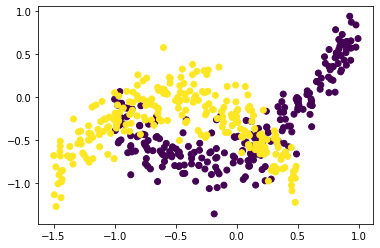

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Inicializamos la semilla de números aleatorios para que siempre se produzca
# la misma secuencia de los mismos
np.random.seed(1)

num_features = 2
num_patterns = 500

X_3 = np.random.uniform(-1,1, num_features * num_patterns).reshape((num_features, num_patterns))
X_3[1,:int(num_patterns / 2)] = (X_3[0,:int(num_patterns / 2)]+0.25)**2 + \
    np.random.randn(int(num_patterns / 2))/5 - 0.75
X_3[0,int(num_patterns / 2):] -= 0.5
X_3[1,int(num_patterns / 2):] = -(X_3[0,int(num_patterns / 2):]+0.5)**2 + \
    np.random.randn(int(num_patterns / 2))/5
Y_3 = np.repeat([0,1], num_patterns / 2).reshape((1, num_patterns))

plt.scatter(X_3[0,:], X_3[1,:], c=Y_3);

In [ ]:
# Entrenamiento
nn_p_l = [None, 10, 5, 2, 1]
g = [identity, relu, relu, relu, protected_sigmoid]
g_prime = [identity_prime, relu_prime, relu_prime, relu_prime, sigmoid_prime]

alpha = 0.001 # Se probó con otros valores, y este pareció el más oportuno
num_iterations = 25000

W,b,loss_output_compl,num_errors_compl = neural_network_training(X_3,Y_3, nn_p_l, g, g_prime, alpha, num_iterations)

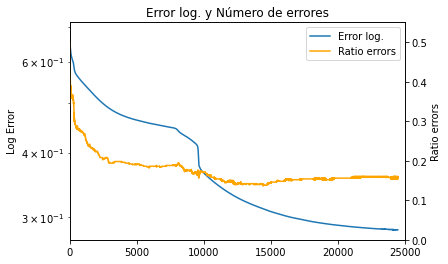

'Current Error log.: 0.28364 / Min Error log.: 0.28358'

'Current Ratio of errors: 15.60000% / Min Ratio of errors: 13.60000%'

100%|██████████| 25000/25000 [00:10<00:00, 2373.06it/s]


<Figure size 432x288 with 0 Axes>

In [15]:
nn_p_l = [None, 10, 5, 2, 1]
g = [identity, relu, relu, relu, protected_sigmoid]
g_prime = [identity_prime, relu_prime, relu_prime, relu_prime, sigmoid_prime]

alpha = 0.001 # Se probó con otros valores, y este pareció el más oportuno
num_iterations = 25000

W,b,loss_output_compl,num_errors_compl = neural_network_training(X_3,Y_3, nn_p_l, g, g_prime, alpha, num_iterations)